In [4]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)
dados.head()

dados['finalizado'] = dados['nao_finalizado'].map({1:0, 0:1})

# jogar fora as linhas com horas_esperadas = 0
dados = dados.query('horas_esperadas > 0')


# MODELO TREINO E TESTE
# #########################################################
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  random_state=SEED, stratify=y)

print(f'Treinaremos com {len(treino_x)} elementos')
print(f'Testaremos com {len(teste_x)} elementos')
print('----------------------------')
# #########################################################

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurárica foi de {acuracia:.2f}%')

Treinaremos com 1617 elementos
Testaremos com 540 elementos
----------------------------
A acurárica foi de 56.67%


/home/alexandre/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


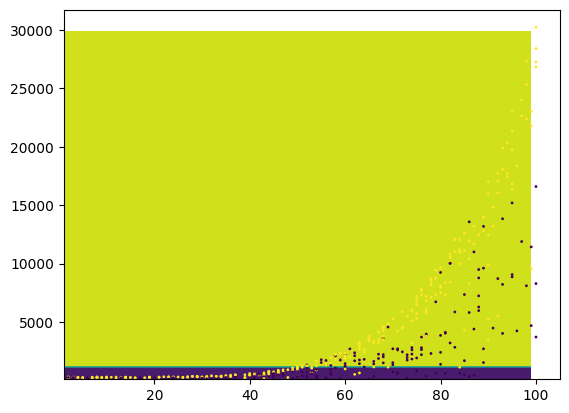

In [5]:
# Curva de Decisão
# valor mínimo de x e de y
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

import numpy as np

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)